This script plots FP data vs NetMHC predictions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('peptide_FP_analysis_v4-forPython-ToUpload.csv')
data['IC50 capped'] = data['Approx IC50 from FP (nM)']
data.loc[data['IC50 capped']>50000,'IC50 capped']=50000


data['color'] = '#000000' 
color_dict = {'AgreeBind':'#AF58BA','Yeast':'#009ADE','AgreeNot':'#FFC61E','NetMHC':'#FF1F5B'}

for name in color_dict.keys():
    data.loc[data['Tube Name'].str.contains(name),'color'] = color_dict[name]

data

,Tube Name,Approx IC50 from FP (nM),15mers,"Peptide+flank (Used in all predictions, except 'no flank')",NetMHCIIpan4.0 DRB1_0401: Core,NetMHCIIpan4.0 DRB1_0401: Score_EL,NetMHCIIpan4.0 DRB1_0401: %Rank_EL,hit d+u (hit in both doped and undoped),hit u (hit in undoped),hit d (hit in doped),best 9mers - hit d+u (9mers contained in 15mer that enriched the most times),best 9mers - hit d+u score,NetMHCIIpan4.0 DRB1_0401 (no flank): Core,NetMHCIIpan4.0 DRB1_0401 (no flank): Score_EL,NetMHCIIpan4.0 DRB1_0401 (no flank): %Rank_EL,IC50 capped,color
0,AgreeBind1,1.576000e+01,RGVYYPDKVFRSSVL,ARGVYYPDKVFRSSVLGGS,YYPDKVFRS,0.580491,1.49,True,True,True,RGVYYPDKV GVYYPDKVF VYYPDKVFR,7,YYPDKVFRS,0.881489,0.19,15.76,#AF58BA
1,AgreeBind2,2.117000e+03,NDGVYFASTEKSNII,ANDGVYFASTEKSNIIGGS,VYFASTEKS,0.314111,4.28,True,True,True,GVYFASTEK VYFASTEKS YFASTEKSN,5,VYFASTEKS,0.734265,0.68,2117.00,#AF58BA
2,AgreeBind3,3.969000e+02,LKSFTVEKGIYQTSN,ALKSFTVEKGIYQTSNGGS,FTVEKGIYQ,0.160695,8.41,True,True,True,LKSFTVEKG KSFTVEKGI SFTVEKGIY FTVEKGIYQ,7,FTVEKGIYQ,0.587244,1.45,396.90,#AF58BA
3,AgreeBind4,1.137000e+02,VADYSVLYNSASFST,AVADYSVLYNSASFSTGGS,YSVLYNSAS,0.162062,8.36,True,True,True,VADYSVLYN ADYSVLYNS DYSVLYNSA,7,YSVLYNSAS,0.665981,0.99,113.70,#AF58BA
4,AgreeBind5,1.054000e+02,AAEIRASANLAATKM,AAAEIRASANLAATKMGGS,IRASANLAA,0.392412,3.13,True,True,True,AAEIRASAN AEIRASANL EIRASANLA,7,IRASANLAA,0.784871,0.50,105.40,#AF58BA
5,AgreeBind6,5.270000e+02,PQIITTDNTFVSGNC,APQIITTDNTFVSGNCGGS,ITTDNTFVS,0.188505,7.32,True,True,True,TTDNTFVSG TDNTFVSGN DNTFVSGNC,7,ITTDNTFVS,0.683546,0.91,527.00,#AF58BA
6,Yeast1,1.465200e+04,NCTFEYVSQPFLMDL,ANCTFEYVSQPFLMDLGGS,YVSQPFLMD,0.002155,64.83,True,True,True,NCTFEYVSQ CTFEYVSQP TFEYVSQPF,7,YVSQPFLMD,0.005796,47.55,14652.00,#009ADE
7,Yeast2A,1.232000e+02,SQPFLMDLEGKQGNF,ASQPFLMDLEGKQGNFGGS,FLMDLEGKQ,0.041819,20.34,True,True,True,SQPFLMDLE QPFLMDLEG FLMDLEGKQ,6,FLMDLEGKQ,0.324829,4.10,123.20,#009ADE
8,Yeast2B,8.613000e+03,QPFLMDLEGKQGNFK,AQPFLMDLEGKQGNFKGGS,FLMDLEGKQ,0.022283,27.73,True,True,True,QPFLMDLEG FLMDLEGKQ,6,FLMDLEGKQ,0.097976,12.21,8613.00,#009ADE
9,Yeast3A,5.216000e+02,TDAVDCALDPLSETK,ATDAVDCALDPLSETKGGS,VDCALDPLS,0.015266,32.68,True,True,True,AVDCALDPL VDCALDPLS,7,VDCALDPLS,0.132449,9.80,521.60,#009ADE


(0.1, 100)

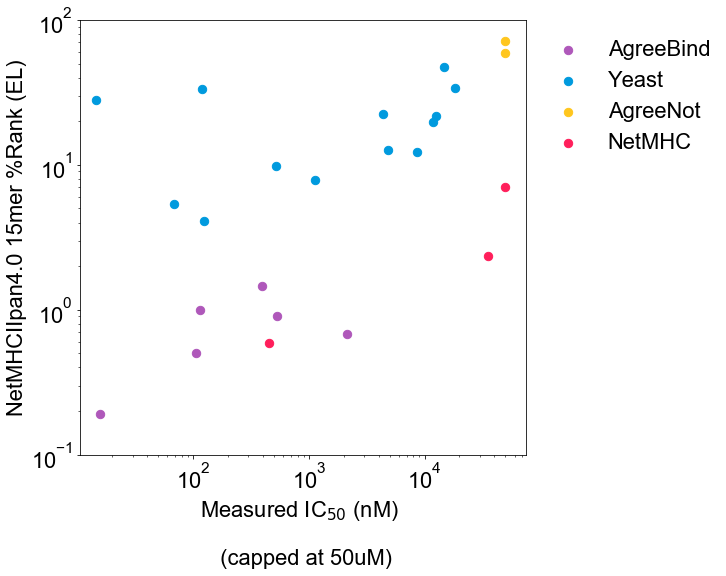

In [4]:
#For Paper - without flanking sequences
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

plt.figure(figsize=(8,8))

for name in color_dict.keys():
    data_subset = data[data['Tube Name'].str.contains(name)] 
    plt.scatter(data_subset['IC50 capped'],data_subset['NetMHCIIpan4.0 DRB1_0401 (no flank): %Rank_EL'],c=color_dict[name],label=name,s=70)

plt.xlabel('Measured IC$_{50}$ (nM)  \n \n (capped at 50uM)')
plt.ylabel('NetMHCIIpan4.0 15mer %Rank (EL)')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), ncol=1,frameon=False)

plt.ylim(0.1,100) 

(1, 100)

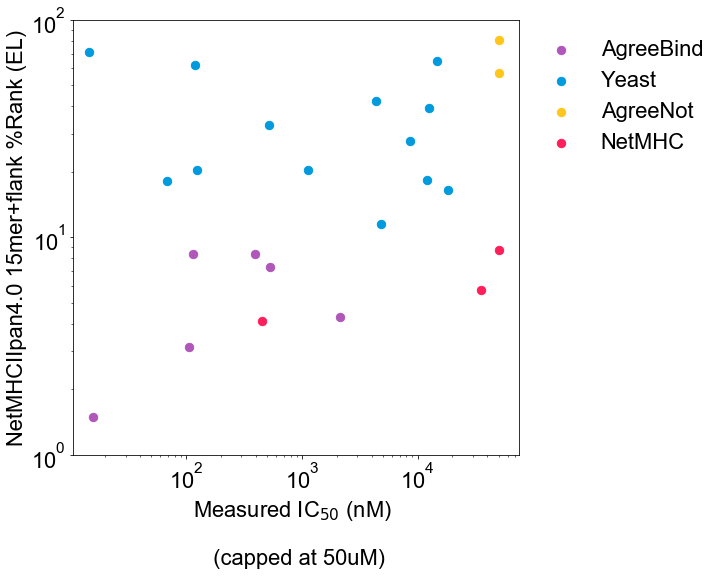

In [5]:
#For Paper - with flanking sequences 
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

plt.figure(figsize=(8,8))

for name in color_dict.keys():
    data_subset = data[data['Tube Name'].str.contains(name)] 
    plt.scatter(data_subset['IC50 capped'],data_subset['NetMHCIIpan4.0 DRB1_0401: %Rank_EL'],c=color_dict[name],label=name,s=70)
    
plt.xlabel('Measured IC$_{50}$ (nM)  \n \n (capped at 50uM)')
plt.ylabel('NetMHCIIpan4.0 15mer+flank %Rank (EL)')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), ncol=1,frameon=False)

plt.ylim(1,100)